In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import re


In [2]:
df=pd.read_csv('Movies.csv')

In [3]:
df

,Movie name,price,Rating,Yrows,Xcols,type,Hero,Heroine
0,Evaru,80,4.5,1,1,Thriller/Drama,adaviseshu,Regina
1,Dear comrade,50,3.0,1,2,Intense love story,Vijay Devarakonda,Rashmika
2,Manmadudu2,188,3.7,1,3,Drama/Romance,Nagarjuna,Rakool
3,Ranarangam,87,3.0,1,4,Action crime film,sharwanand,"kajal,kalyani"
4,guna369,120,4.0,1,5,Drama/Action,Karthikeya,Anagha
5,Rakshasudu,145,4.5,2,1,Drama/Thriller,Bellamkonda srinivas,Anupama
6,Ismartsankar,140,4.5,2,2,Action/Romance,Ram,"Nabha natesha,Nidhi agarwal"
7,Oh baby,69,3.0,2,3,Drama/Fantacy,Naga shaurya,Samantha
8,Agent sai srinivas,80,4.5,2,4,Drama/Thriller,Naveen Polisetty,Shruthi Sharma
9,maharshi,70,4.0,2,5,Drama/Triller,Mahesh Babu,Pooja Hegde


In [20]:
df.rename({'Movie name':'Movie'},axis=1,inplace=True)

In [21]:
df

,Movie,price,Rating,Yrows,Xcols,type,Hero,Heroine
0,Evaru,80,4.5,1,1,Thriller/Drama,adaviseshu,Regina
1,Dear comrade,50,3.0,1,2,Intense love story,Vijay Devarakonda,Rashmika
2,Manmadudu2,188,3.7,1,3,Drama/Romance,Nagarjuna,Rakool
3,Ranarangam,87,3.0,1,4,Action crime film,sharwanand,"kajal,kalyani"
4,guna369,120,4.0,1,5,Drama/Action,Karthikeya,Anagha
5,Rakshasudu,145,4.5,2,1,Drama/Thriller,Bellamkonda srinivas,Anupama
6,Ismartsankar,140,4.5,2,2,Action/Romance,Ram,"Nabha natesha,Nidhi agarwal"
7,Oh baby,69,3.0,2,3,Drama/Fantacy,Naga shaurya,Samantha
8,Agent sai srinivas,80,4.5,2,4,Drama/Thriller,Naveen Polisetty,Shruthi Sharma
9,maharshi,70,4.0,2,5,Drama/Triller,Mahesh Babu,Pooja Hegde


In [23]:
movie=(np.asarray(df['Movie'])).reshape(2,5)

In [24]:
movie

array([['Evaru', 'Dear comrade', 'Manmadudu2', 'Ranarangam', 'guna369'],
       ['Rakshasudu', 'Ismartsankar', 'Oh baby', 'Agent sai srinivas',
        'maharshi']], dtype=object)

In [25]:
price=(np.asarray(df['price'])).reshape(2,5)
price

array([[ 80,  50, 188,  87, 120],
       [145, 140,  69,  80,  70]], dtype=int64)

In [26]:
rating=(np.asarray(df['Rating'])).reshape(2,5)
typ=(np.asarray(df['type'])).reshape(2,5)
hero=(np.asarray(df['Hero'])).reshape(2,5)
heroine=(np.asarray(df['Heroine'])).reshape(2,5)
print(rating)
print(typ)
print(hero)
print(heroine)

[[4.5 3.  3.7 3.  4. ]
 [4.5 4.5 3.  4.5 4. ]]
[['Thriller/Drama' 'Intense love story' 'Drama/Romance'
  'Action crime film' 'Drama/Action']
 ['Drama/Thriller' 'Action/Romance' 'Drama/Fantacy' 'Drama/Thriller'
  'Drama/Triller']]
[['adaviseshu' 'Vijay Devarakonda' 'Nagarjuna' 'sharwanand' 'Karthikeya']
 ['Bellamkonda srinivas' 'Ram' 'Naga shaurya' 'Naveen Polisetty'
  'Mahesh Babu']]
[['Regina' 'Rashmika' 'Rakool' 'kajal,kalyani' 'Anagha']
 ['Anupama' 'Nabha natesha,Nidhi agarwal' 'Samantha' 'Shruthi Sharma'
  'Pooja Hegde']]


In [38]:
result=df.pivot(index='Yrows',columns='Xcols',values='Rating')

In [39]:
result

Xcols,1,2,3,4,5
Yrows,,,,,
1,4.5,3.0,3.7,3.0,4.0
2,4.5,4.5,3.0,4.5,4.0


In [45]:
labels=(np.asarray(['{0}   \n {1} \n {2} \n {3} \n {4}'.format(name,hero,heroine,price,rating) 
                    for name,hero,heroine,price,rating 
                    in zip(movie.flatten(),hero.flatten(),heroine.flatten(),price.flatten(),rating.flatten())])).reshape(2,5)

In [46]:
labels

array([['Evaru   \n adaviseshu \n Regina \n 80 \n 4.5',
        'Dear comrade   \n Vijay Devarakonda \n Rashmika \n 50 \n 3.0',
        'Manmadudu2   \n Nagarjuna \n Rakool \n 188 \n 3.7',
        'Ranarangam   \n sharwanand \n kajal,kalyani \n 87 \n 3.0',
        'guna369   \n Karthikeya \n Anagha \n 120 \n 4.0'],
       ['Rakshasudu   \n Bellamkonda srinivas \n Anupama \n 145 \n 4.5',
        'Ismartsankar   \n Ram \n Nabha natesha,Nidhi agarwal \n 140 \n 4.5',
        'Oh baby   \n Naga shaurya \n Samantha \n 69 \n 3.0',
        'Agent sai srinivas   \n Naveen Polisetty \n Shruthi Sharma \n 80 \n 4.5',
        'maharshi   \n Mahesh Babu \n Pooja Hegde \n 70 \n 4.0']],
      dtype='<U67')

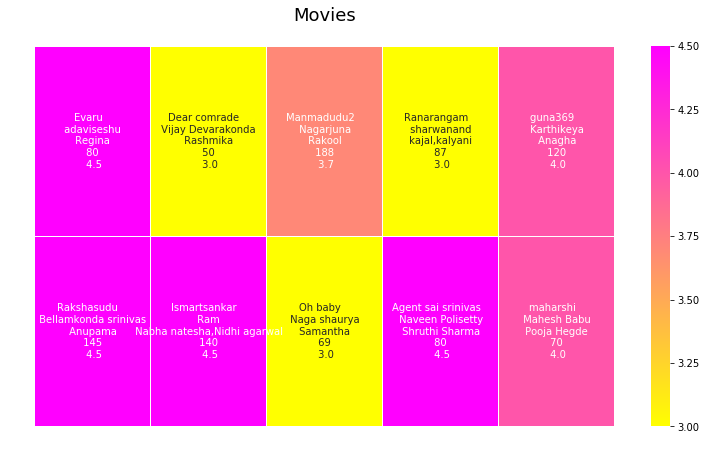

In [47]:
#Heat map
fig,ax=plt.subplots(figsize=(13,7))
title="Movies"
plt.title(title,fontsize=18)
tt1=ax.title
tt1.set_position([0.5,1.05])
ax.set_xticks([])
ax.set_yticks([])
ax.axis('off')
sn.heatmap(result,annot=labels,fmt="",cmap="spring_r",linewidths=0.30,ax=ax)
plt.show()
